<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        PROJECT 7 - K-means
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> Scientific Programming</b> <br>  <b>AY 2021/2022</b> <br>
    Emanuele Cavalleri<br>(matriculation number: <b>995883</b>)<br>
    <a href="mailto:emanuele.cavalleri@mail.polimi.it">emanuele.cavalleri@mail.polimi.it</a><br>
    <a href="https://github.com/emanuelecavalleri/K-means">GitHub link for this project</a><br>
    </div>
</tr>
</table>

**Short description**: kmeans is one of the most popular clustering algorithms for vectors. Starting from a number of clusters, generates a random clustering of the objects: then applies iteratively two steps, namely assignment and update until convergence, to identify a proper clustering.

**Expected outcome**: Implement a python script that:
1. Takes as input:
    <ol>
         <li>A number of clusters</li>
         <li>A CSV file, where each line of the file correspond to a point (vector) in the space</li>
    </ol>
2. Implements a version of kmeans based on lists (thus, each line of the CSV is translated in a list)
3. Implements a version of kmeans based on numpy vectors (thus, each line of the CSV is translated in a numpy vector)
4. Test the two implementations providing charts and visual representations that show, depending on the size of the vectors, the number of the vectors and the number of clusters, how the performance changes.

<img src="https://miro.medium.com/max/1200/1*TmvsQ4XaOxeb-TmKk1qgOw.png" alt=""> 

1. Take as input:
    <ol>
         <li>A number of clusters</li>
         <li>A CSV file, where each line of the file correspond to a point (vector) in the space</li>
    </ol>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Test dataset: 10,000 samples/rows, 3 dimensions, 5 "real" clusters
data = make_blobs(n_samples=10000, n_features=3, centers=5, random_state=42)

k = 5 # Number of clusters

# Save onto a CSV
np.savetxt("data.csv", data[0], delimiter=",")

# Simulating CSV user's input
df = pd.read_csv('data.csv', sep = ',', header=None, names=["x","y","z"])
# data[1] is the array of labels
df['label'] = data[1]
df

,x,y,z,label
0,1.629976,-8.685850,-8.198777,1
1,4.986461,-8.627624,7.409564,3
2,-7.740665,5.857463,3.265846,2
3,0.384800,-6.157600,-8.517338,1
4,-1.808461,8.735895,5.273240,0
...,...,...,...,...
9995,7.055912,-4.768579,-4.606590,4
9996,6.363859,-5.151740,-7.377719,4
9997,6.357837,-5.674293,-5.843819,4
9998,5.542797,-7.196482,7.847077,3


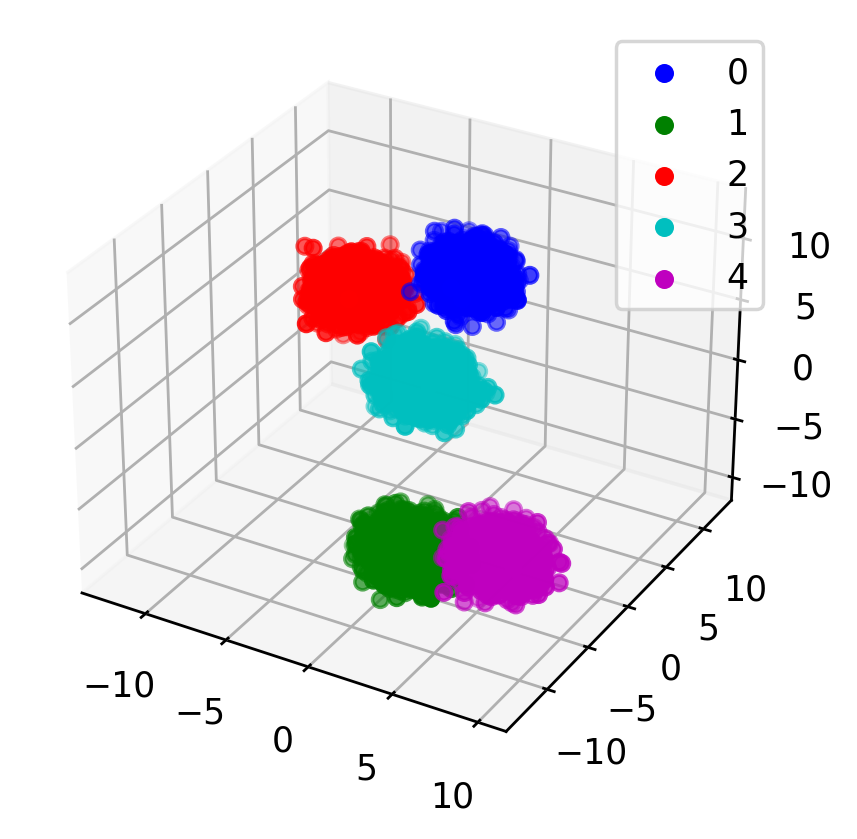

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcl

# Visualizing the test dataset with "real" clusters
cluster = df['label']
fig = plt.figure(dpi=250)
ax = fig.gca(projection='3d')
colors = list(mcl.BASE_COLORS.keys())

for i in range(k):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

2. Implements a version of kmeans based on lists (thus, each line of the CSV is translated in a list)

In [3]:
data = df.drop('label', axis=1).values.tolist()
data[:5] # First five lists

[[1.6299756356763109, -8.685850406491166, -8.198776821304605],
 [4.986461030686848, -8.627623883392305, 7.4095638136576785],
 [-7.740664945039409, 5.857463245100432, 3.265845835961983],
 [0.38480043569014966, -6.1576002327948265, -8.517337500200009],
 [-1.8084613379198529, 8.735894957387343, 5.273240151071754]]

In [4]:
from collections import defaultdict
from math import sqrt
import random
random.seed(4000)

def square(list):
    return map(lambda element : element ** 2, list)

# Euclidean distance between 2 lists
def dist_list(list1,list2):
    diff = [element_list1 - element_list2 for element_list1, element_list2 in zip(list1, list2)]
    return sqrt(sum(square(diff)))

# Euclidean distance between 2 numpy arrays
def dist_np(np_array1, np_array2):
    return np.sqrt(((np_array1 - np_array2) ** 2).sum())

def list_kmeans(k, data, number_of_iteration, threshold):
    
    # Randomly pick k data points as our initial centroids
    centroids = sample(data, k)
    centroid_update = [] # Keep centroid of each iteration
    count = 0
    
    while count < number_of_iteration:
        count += 1
        
        # Dict to assign the cluster to each data point
        centroid_dict = defaultdict(list)
        for point in data:
            min_dist = float('inf') # Initialize minimum distance to infinite
            temp = None
            
            for centroid in centroids:
                # Finding the distance between centroids and all the data points
                d = dist_list(centroid, point)
                if d < min_dist:
                    # Closest centroid for this point 
                    min_dist = d
                    temp = centroid
                    
            # Assigning the datapoint to the closest cluster
            centroid_dict[str(temp)].append(point)
        
        centroids = [] # List of centroids
        for centroid in centroid_dict:
            # Updating centroids by taking mean of cluster it belongs to
            centroids.append(np.array(centroid_dict[centroid]).mean(axis=0))
        
        centroid_update.append(np.array(centroids))
        
        # Checking for convergence of centroid
        if len(centroid_update) > 1 and dist_np(centroid_update[-1], centroid_update[-2]) < threshold:
            return centroids, count
    return centroids, count

In [5]:
NUMBER_OF_ITERATION = 1000
THRESHOLD = 10**-4
(mu, it) = list_kmeans(k, data, NUMBER_OF_ITERATION, THRESHOLD)
print(f'The centroids of the K = {k} clusters are {mu}')
print(f'\nNumber of iterations = {it}')

The centroids of the K = 5 clusters are [array([ 1.94480743, -6.91225051, -6.87296099]), array([ 4.16063297, -9.57859636,  9.40797231]), array([-8.80226214,  7.31350708,  2.05749686]), array([-2.49422074,  8.95062726,  4.64782837]), array([ 6.62481509, -5.72486027, -6.35085893])]

Number of iterations = 13


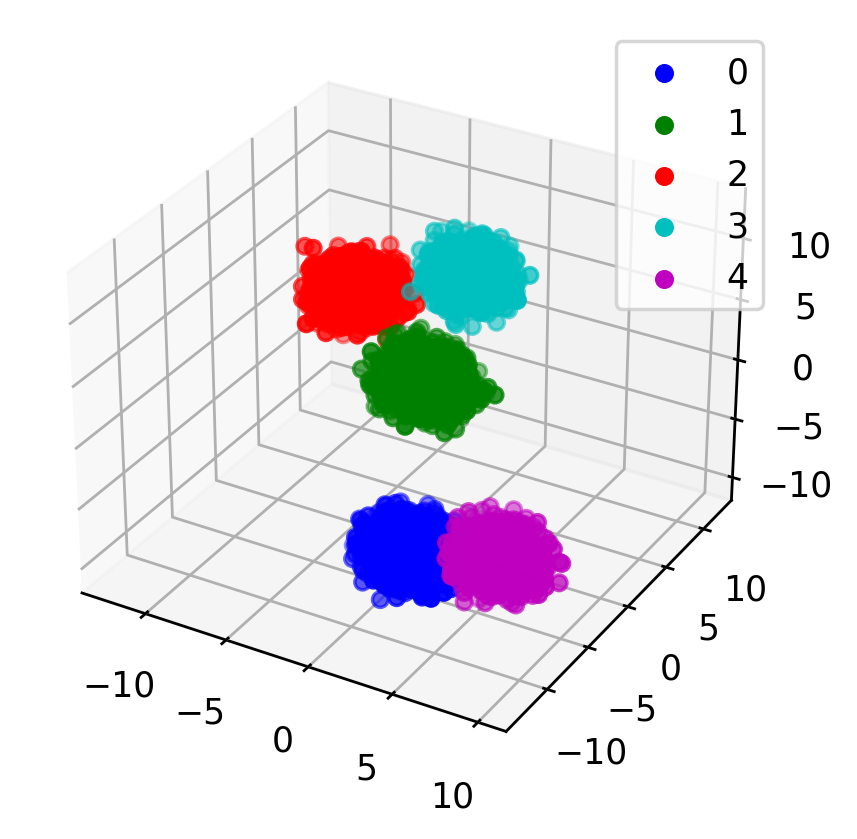

In [6]:
# Assign clusters
def assign(points,mu):
    min_dist = float('inf')
    for i, point in enumerate(mu):
        if dist_np(np.array(point),points) < min_dist:
            min_dist = dist_np(np.array(point),points)
            cluster = i
    return cluster

# Visualizing the dataset based on the clusters that we created using k-means clustering algorithm
cluster = df.apply(lambda df: assign([df.x,df.y,df.z],mu),axis=1)
fig = plt.figure(dpi=250)
ax = fig.gca(projection='3d')

for i in range(k):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

3. Implements a version of kmeans based on numpy vectors (thus, each line of the CSV is translated in a numpy vector)

In [7]:
np.random.seed(98765432)

def npkmeans(k, data, number_of_iteration, threshold):
    
    y = 0
    
    # Randomly pick k data points as our initial centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    centroid_update = [] # Keep centroid of each iteration
    count = 0
    same_centroids = 0
    
    while count < number_of_iteration:
        count += 1
        
        # Dict to assign the cluster to each data point
        centroid_dict = defaultdict(list)
        for point in data:
            min_dist = float('inf') # Initialize minimum distance to infinite
            temp = None
            
            for centroid in centroids:
                # Finding the distance between centroids and all the data points
                d = dist_np(np.array(centroid), point)
                
                if d < min_dist:
                    # Closest centroid for this point 
                    min_dist = d
                    temp = centroid
                    
            # Assigning the datapoint to the closest cluster
            centroid_dict[str(temp)].append(point)
        
        centroids = [] # List of centroids
        for centroid in centroid_dict:
            # Updating centroids by taking mean of cluster it belongs to
            centroids.append(np.array(centroid_dict[centroid]).mean(axis=0))
        centroid_update.append(np.array(centroids))
        
        # Checking for convergence of centroid
        if len(centroid_update) > 1 and dist_np(centroid_update[-1], centroid_update[-2]) < threshold:
            return centroids, count
        return centroids, count

The centroids of the K = 5 clusters are [array([ 1.94480743, -6.91225051, -6.87296099]), array([ 4.16063297, -9.57859636,  9.40797231]), array([-8.80226214,  7.31350708,  2.05749686]), array([-2.49422074,  8.95062726,  4.64782837]), array([ 6.62481509, -5.72486027, -6.35085893])]

Number of iterations = 13


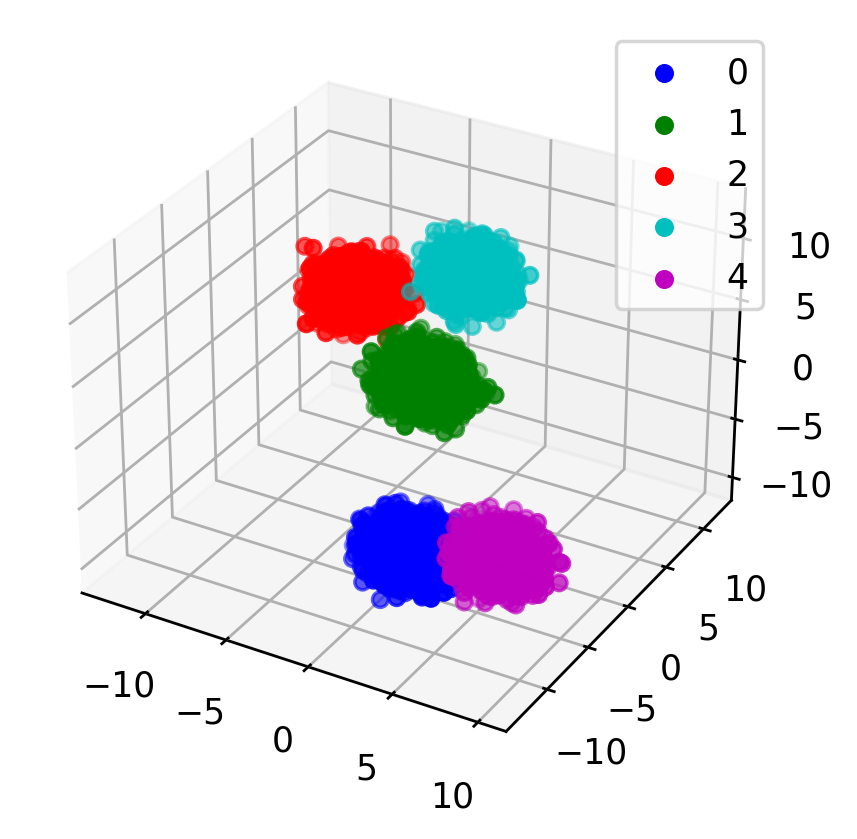

In [8]:
data_np = df.drop('label', axis=1).values
(mu, it) = npkmeans(k, data_np, NUMBER_OF_ITERATION, THRESHOLD)
print(f'The centroids of the K = {k} clusters are {mu}')
print(f'\nNumber of iterations = {it}')

cluster = df.apply(lambda df: assign([df.x,df.y,df.z],mu),axis=1)
fig = plt.figure(dpi=250)
ax = fig.gca(projection='3d')

for i in range(k):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

4. Test the two implementations providing charts and visual representations that show, depending on the size of the vectors, the number of the vectors and the number of clusters, how the performance changes.

First of all let's run `sklearn.KMeans` to compare the output.

The centroids of the K = 5 clusters are [[1.9436979512648582, -6.912650449191894, -6.873450977271873], [-8.802262140502899, 7.313507084528765, 2.0574968600086185], [-2.4942207425946314, 8.950627260978923, 4.647828369976588], [6.623585170274563, -5.725055050571815, -6.350633573782177], [4.160632965251228, -9.57859636111402, 9.407972308887384]]

Number of iterations = 5


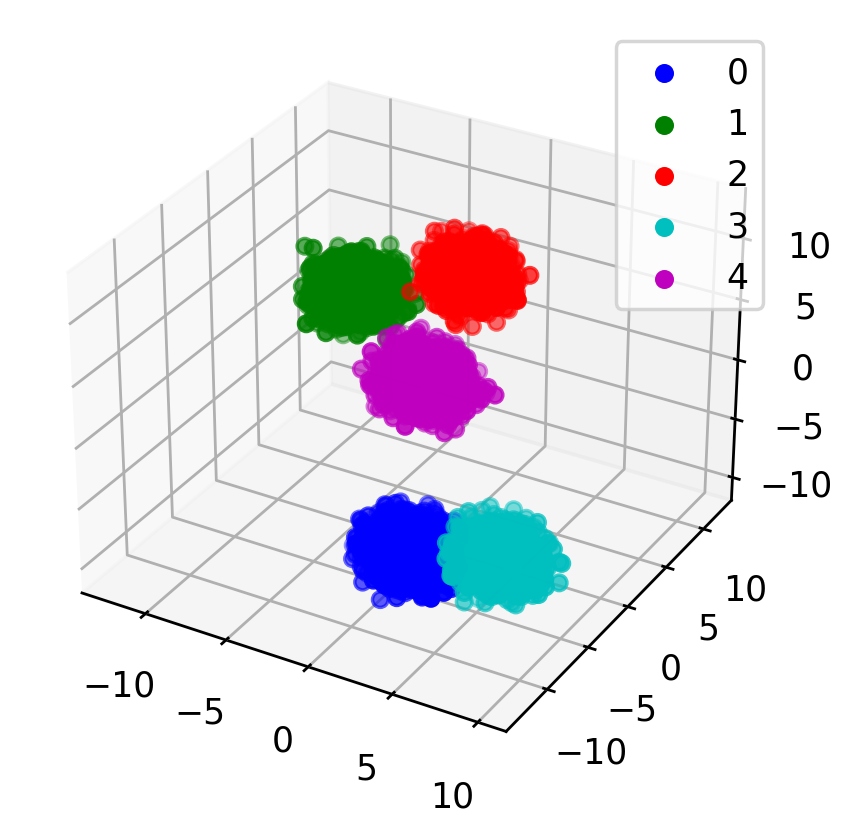

In [9]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=k, init='random', max_iter=NUMBER_OF_ITERATION, tol=THRESHOLD, random_state=42)
y_predict = model.fit_predict(data)
print(f'The centroids of the K = {k} clusters are {model.cluster_centers_.tolist()}')
print(f'\nNumber of iterations = {model.n_iter_}')

cluster = df.apply(lambda df: assign([df.x,df.y,df.z],model.cluster_centers_.tolist()),axis=1)

fig = plt.figure(dpi=250)
ax = fig.gca(projection='3d')

for i in range(k):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

Let's compare now the $3$ algorithms' efficiency (running them $3$ times each one).

**Please notice** that the subsequent part is quite computationally expensive (and therefore time-consuming); being a test section, run it only if needed.

In [10]:
import time

starttime=time.time()
list_iterations = 0
for i in range(3):   
    _,it = list_kmeans(k, data, NUMBER_OF_ITERATION, THRESHOLD)
    list_iterations += it
list_stopwatch = time.time() - starttime
print(f"List-based K-means' mean time: {list_stopwatch/3.}")
print(f"List-based K-means' mean iterations: {list_iterations/3.}")

starttime=time.time()
np_iterations = 0
for i in range(3): 
    _,it = npkmeans(k, data_np, NUMBER_OF_ITERATION, THRESHOLD)
    np_iterations += it
np_stopwatch = time.time() - starttime
print(f"npArray-based K-means' mean time: {np_stopwatch/3.}")
print(f"npArray-based K-means' mean iterations: {np_iterations/3.}")

model = KMeans(n_clusters=k, init='random',max_iter=NUMBER_OF_ITERATION,tol=THRESHOLD)
starttime=time.time()
sklearn_iterations = 0
for i in range(3):    
    model.fit_predict(data)
    sklearn_iterations += model.n_iter_
sklearn_stopwatch = time.time() - starttime
print(f"sklearn K-means' mean time: {sklearn_stopwatch/3.}")
print(f"sklearn K-means' mean iterations: {sklearn_iterations/3.}")

List-based K-means' mean time: 12.812390645345053
List-based K-means' mean iterations: 15.333333333333334
npArray-based K-means' mean time: 56.9140039285024
npArray-based K-means' mean iterations: 56.0
sklearn K-means' mean time: 0.08128666877746582
sklearn K-means' mean iterations: 4.333333333333333


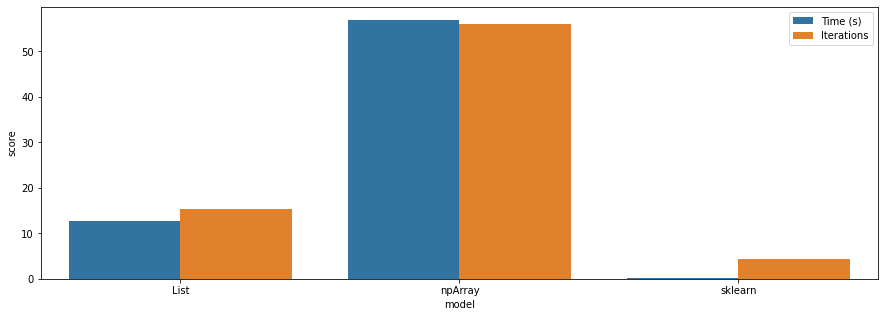

In [11]:
import seaborn as sns

hist = pd.DataFrame()
scores = []
it = []
scores.append(list_stopwatch/3.)
scores.append(np_stopwatch/3.)
scores.append(sklearn_stopwatch/3.)
it.append(list_iterations/3.)
it.append(np_iterations/3.)
it.append(sklearn_iterations/3.)
hist['model'] = ['List', 'npArray', 'sklearn'] * 2
hist['metric'] = ['Time (s)'] * len(scores) + ['Iterations'] * len(it)
hist['score'] = scores + it
plt.figure(figsize=(15,5))
_ = sns.barplot(x='model', y='score', data=hist, hue='metric')
_ = plt.legend(loc='upper right')

As we can see from the histogram, `sklearn.KMeans` is the most efficient implementation. List implementation is faster than the one based on numpy arrays (basically the only difference is on how we compute distances, and the euclidean distance between lists seems to be more efficient).

Let's compare then the algorithms running with a wrong number of clusters (in eccess, i.e. $8$ instead of $5$).

List-based K-means' mean time: 53.57407037417094
List-based K-means' mean iterations: 56.333333333333336


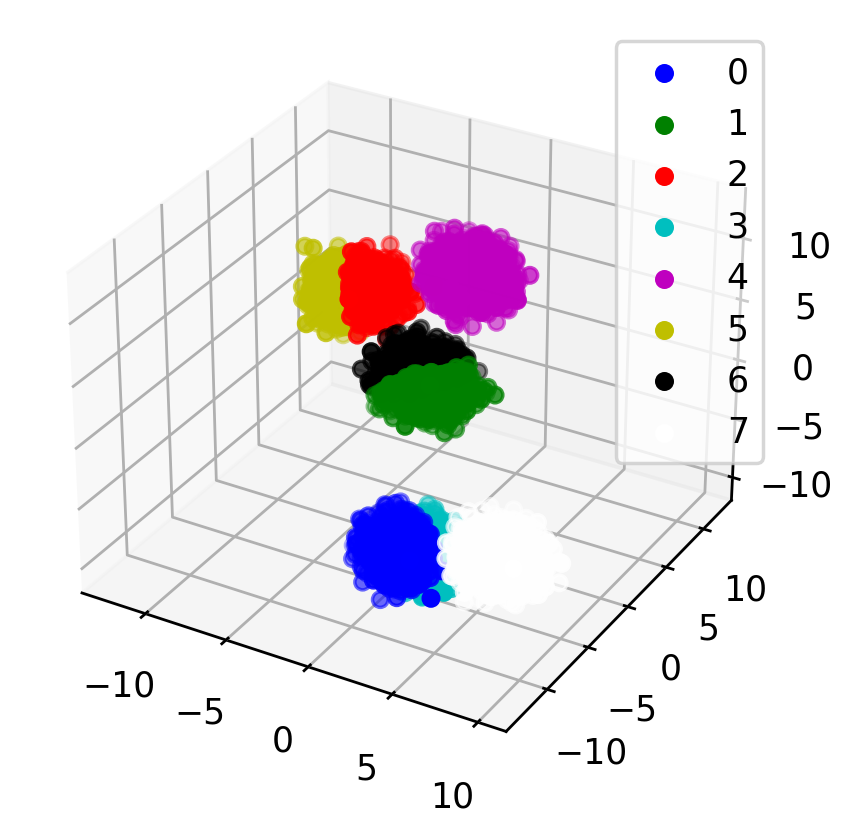

In [12]:
starttime=time.time()
list_iterations = 0
for i in range(3):   
    mu,it = list_kmeans(8, data, NUMBER_OF_ITERATION, THRESHOLD)
    list_iterations += it
list_stopwatch = time.time() - starttime
print(f"List-based K-means' mean time: {list_stopwatch/3.}")
print(f"List-based K-means' mean iterations: {list_iterations/3.}")

# mu of last iteration
cluster = df.apply(lambda df: assign([df.x,df.y,df.z],mu),axis=1)

fig = plt.figure(dpi=250)
ax = fig.gca(projection='3d')

for i in range(8):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

npArray-based K-means' mean time: 67.77209933598836
npArray-based K-means' mean iterations: 59.666666666666664


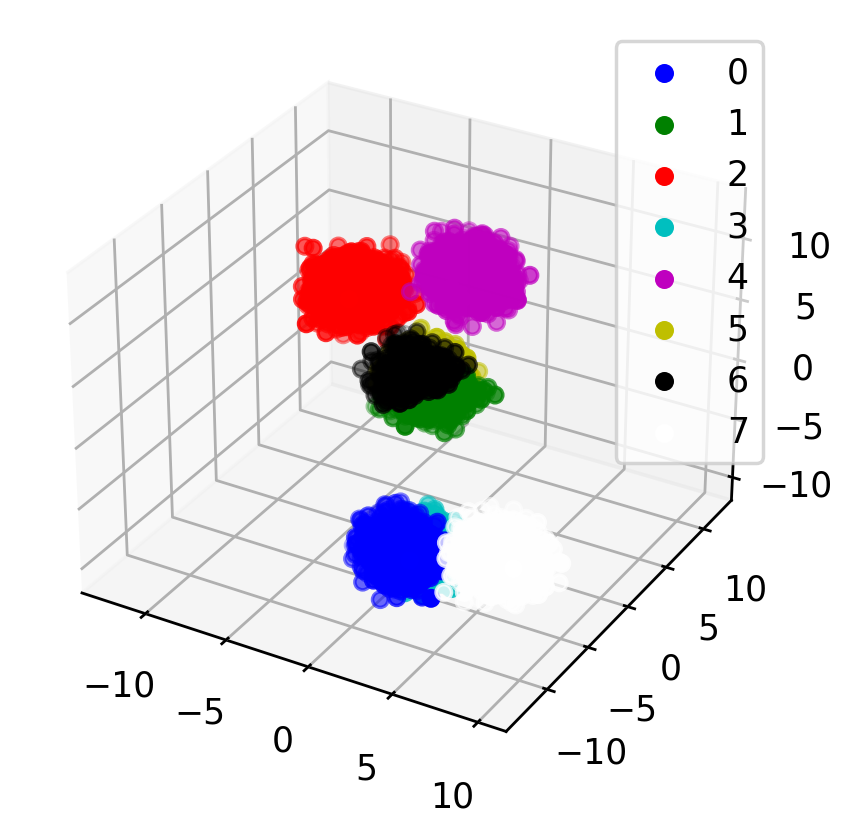

In [13]:
starttime=time.time()
np_iterations = 0
for i in range(3):   
    mu,it = npkmeans(8,data_np,NUMBER_OF_ITERATION, THRESHOLD)
    np_iterations += it
np_stopwatch = time.time() - starttime
print(f"npArray-based K-means' mean time: {np_stopwatch/3.}")
print(f"npArray-based K-means' mean iterations: {np_iterations/3.}")

cluster = df.apply(lambda df: assign([df.x,df.y,df.z],mu),axis=1)

fig = plt.figure(dpi=250)
ax = fig.gca(projection='3d')

for i in range(8):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

sklearn K-means' time: 0.10471264521280925
sklearn K-means' iterations: 13.666666666666666


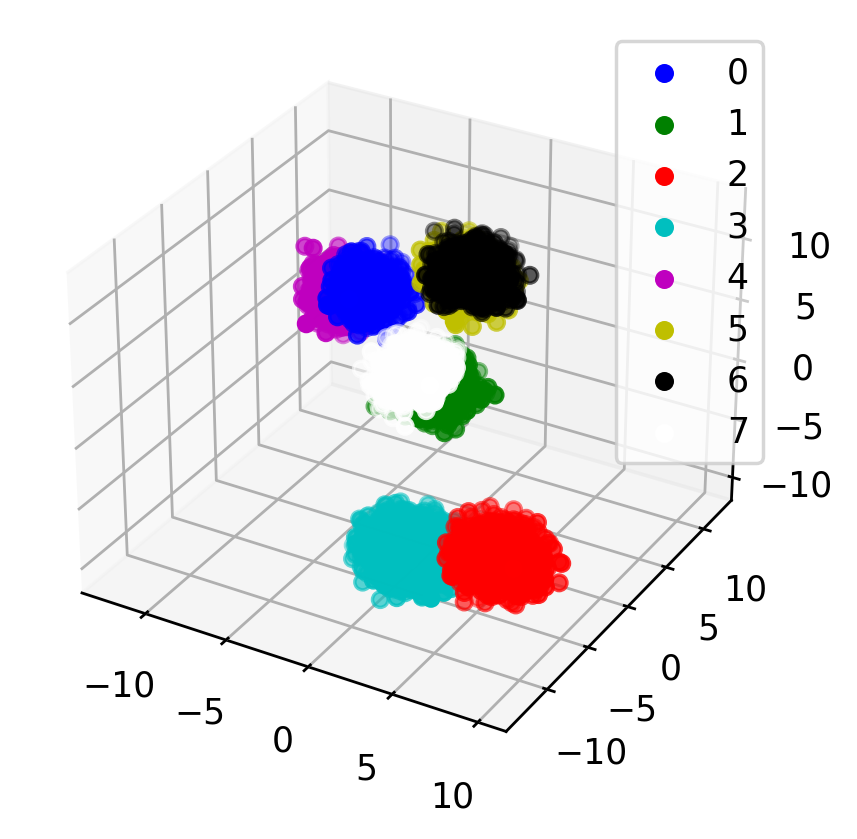

In [14]:
model = KMeans(n_clusters=8, init='random', max_iter=NUMBER_OF_ITERATION, tol=THRESHOLD)
starttime=time.time()
sklearn_iterations = 0
for i in range(3):    
    model.fit_predict(data)
    sklearn_iterations += model.n_iter_
sklearn_stopwatch = time.time() - starttime
print(f"sklearn K-means' time: {sklearn_stopwatch/3.}")
print(f"sklearn K-means' iterations: {sklearn_iterations/3.}")

cluster = df.apply(lambda df: assign([df.x,df.y,df.z],model.cluster_centers_.tolist()),axis=1)

fig = plt.figure(dpi=250)
ax = fig.gca(projection='3d')

for i in range(8):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

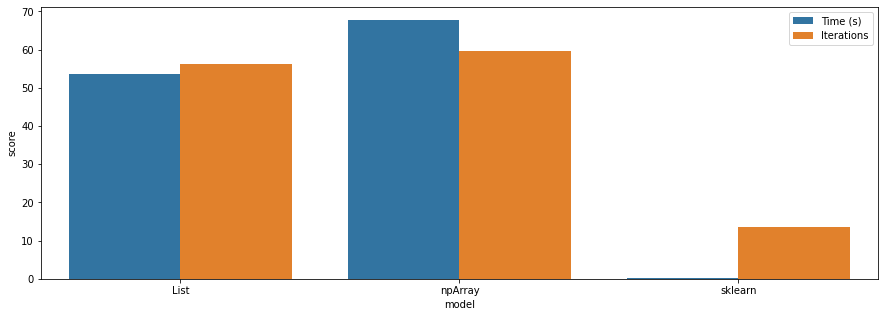

In [15]:
hist = pd.DataFrame()
scores = []
it = []
scores.append(list_stopwatch/3.)
scores.append(np_stopwatch/3.)
scores.append(sklearn_stopwatch/3.)
it.append(list_iterations/3.)
it.append(np_iterations/3.)
it.append(sklearn_iterations/3.)
hist['model'] = ['List', 'npArray', 'sklearn'] * 2
hist['metric'] = ['Time (s)'] * len(scores) + ['Iterations'] * len(it)
hist['score'] = scores + it
plt.figure(figsize=(15,5))
_ = sns.barplot(x='model', y='score', data=hist, hue='metric')
_ = plt.legend(loc='upper right')

Obviously, larger $k$ means higher amount of time, but `sklearn.KMeans` always performs best and not comparably to both the other implementations.

Now we will compare the algorithms running with a wrong number of clusters (this time in defect, i.e. $3$ instead of $5$).

List-based K-means' time: 18.193891286849976
List-based K-means' iterations: 24.0


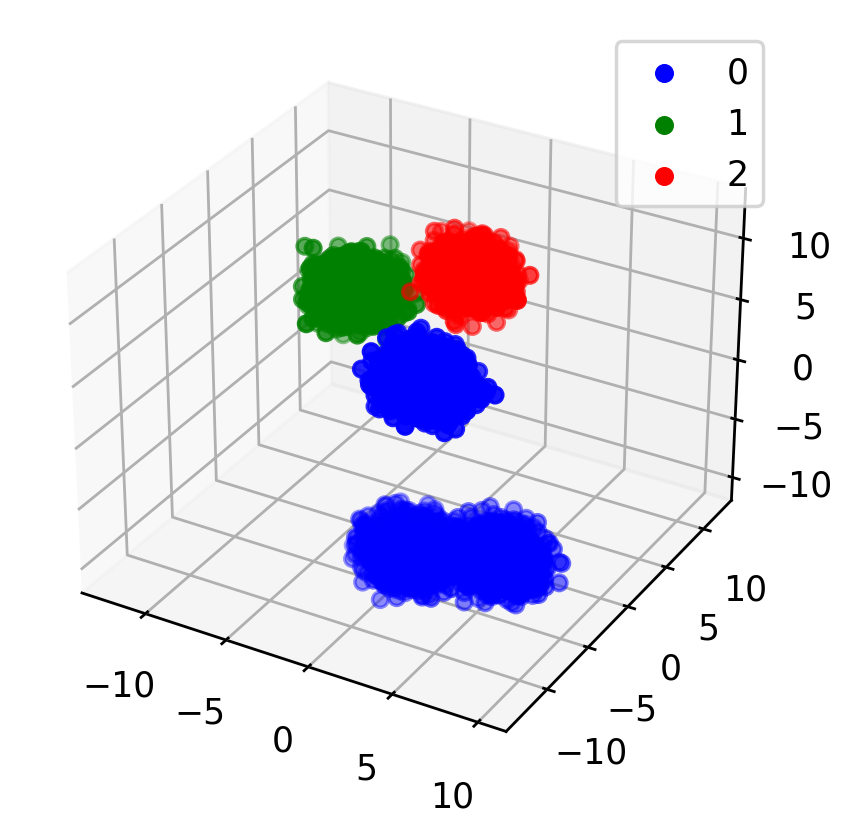

In [16]:
starttime=time.time()
list_iterations = 0
for i in range(3):   
    mu,it = list_kmeans(3, data, NUMBER_OF_ITERATION, THRESHOLD)
    list_iterations += it
list_stopwatch = time.time() - starttime
print(f"List-based K-means' time: {list_stopwatch/3.}")
print(f"List-based K-means' iterations: {list_iterations/3.}")

cluster = df.apply(lambda df: assign([df.x,df.y,df.z],mu),axis=1)

fig = plt.figure(dpi=250)
ax = fig.gca(projection='3d')

for i in range(3):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

npArray-based K-means' time: 9.842952648798624
npArray-based K-means' iterations: 11.333333333333334


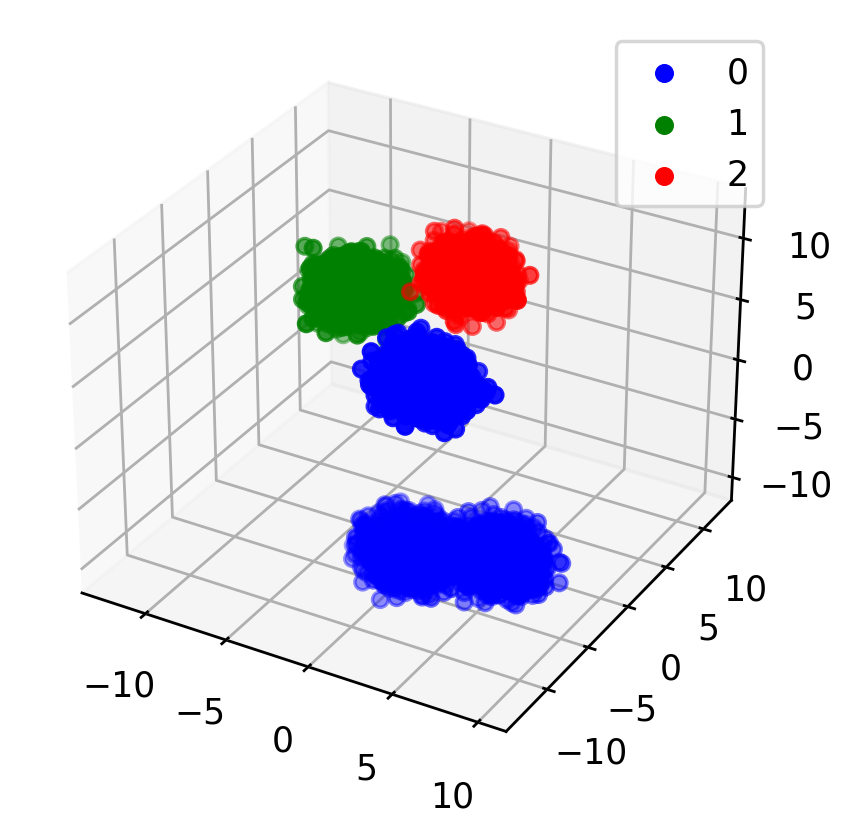

In [17]:
starttime=time.time()
np_iterations = 0
for i in range(3): 
    mu,it = npkmeans(3, data_np, NUMBER_OF_ITERATION, THRESHOLD)
    np_iterations += it
np_stopwatch = time.time() - starttime
print(f"npArray-based K-means' time: {np_stopwatch/3.}")
print(f"npArray-based K-means' iterations: {np_iterations/3.}")

cluster = df.apply(lambda df: assign([df.x,df.y,df.z],mu),axis=1)

fig = plt.figure(dpi=250)
ax = fig.gca(projection='3d')

for i in range(3):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

sklearn K-means' time: 0.056535959243774414
sklearn K-means' iterations: 3.6666666666666665


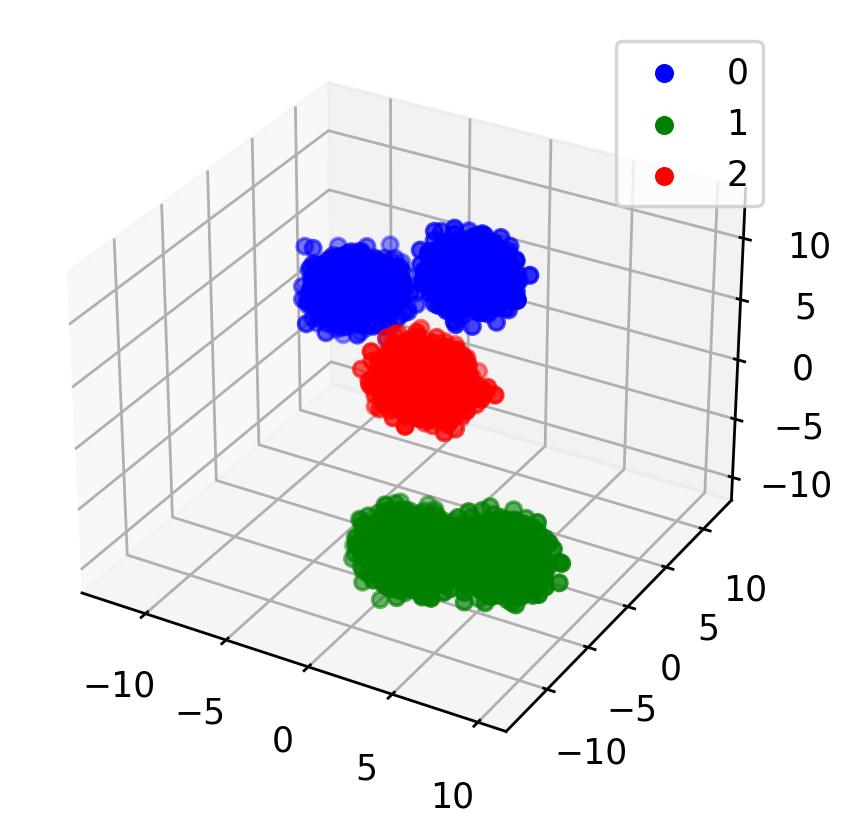

In [18]:
model = KMeans(n_clusters=3, init='random', max_iter=NUMBER_OF_ITERATION, tol=THRESHOLD)
starttime=time.time()
sklearn_iterations = 0
for i in range(3):    
    model.fit_predict(data)
    sklearn_iterations += model.n_iter_
sklearn_stopwatch = time.time() - starttime
print(f"sklearn K-means' time: {sklearn_stopwatch/3.}")
print(f"sklearn K-means' iterations: {sklearn_iterations/3.}")

cluster = df.apply(lambda df: assign([df.x,df.y,df.z],model.cluster_centers_.tolist()),axis=1)

fig = plt.figure(dpi=250)
ax = fig.gca(projection='3d')

for i in range(3):
    ax.scatter(df[cluster==i].x, df[cluster==i].y, df[cluster==i].z, c=colors[i], label=i)
_ = plt.legend()

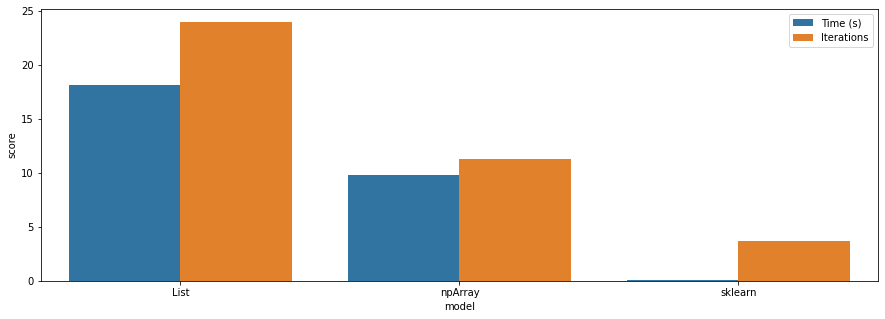

In [19]:
hist = pd.DataFrame()
scores = []
it = []
scores.append(list_stopwatch/3.)
scores.append(np_stopwatch/3.)
scores.append(sklearn_stopwatch/3.)
it.append(list_iterations/3.)
it.append(np_iterations/3.)
it.append(sklearn_iterations/3.)
hist['model'] = ['List', 'npArray', 'sklearn'] * 2
hist['metric'] = ['Time (s)'] * len(scores) + ['Iterations'] * len(it)
hist['score'] = scores + it
plt.figure(figsize=(15,5))
_ = sns.barplot(x='model', y='score', data=hist, hue='metric')
_ = plt.legend(loc='upper right')

Lower number  of $k$ means less time for every implementation with `sklearn.KMeans` always performing best. This time numpy array based implementation performs fine with a lower mean number of iterations with respect to list based implementation.

Last section for this project: we input vectors in 6 dimensions to see if and how cluster change (K-means has problems in high-dimensionality spaces).

In [20]:
# Test dataset: 10,000 samples/rows, 6 dimensions, 4 "real" clusters
data = make_blobs(n_samples=10000, n_features=6, centers=4, random_state=42)
k = 4

df = pd.DataFrame(data[0])
df.columns = ["x","y","z","w","q","t"]
df['label'] = data[1]
df

,x,y,z,w,q,t,label
0,-9.334442,7.407545,1.937863,3.508715,-10.141933,9.031824,1
1,-2.020067,9.069457,4.639270,3.169797,-5.363511,-8.387663,0
2,-2.298073,8.596037,4.290180,1.998842,-6.630035,-7.027281,0
3,-7.261870,7.818028,1.745420,4.270799,-8.685022,9.584158,1
4,-9.662395,9.178787,3.392702,5.728647,-10.238609,7.789796,1
...,...,...,...,...,...,...,...
9995,-1.858471,-2.491138,1.688937,-6.746819,-4.976070,-2.671104,3
9996,-0.869241,8.510929,5.173505,0.518608,-7.070152,-6.588735,0
9997,-4.388665,7.217294,4.801965,2.835560,-8.497249,-6.430397,0
9998,-10.669979,6.422420,1.886204,3.963922,-10.137855,9.317209,1


PCA technique helps us visualizing the dataset under analysis in 2D.

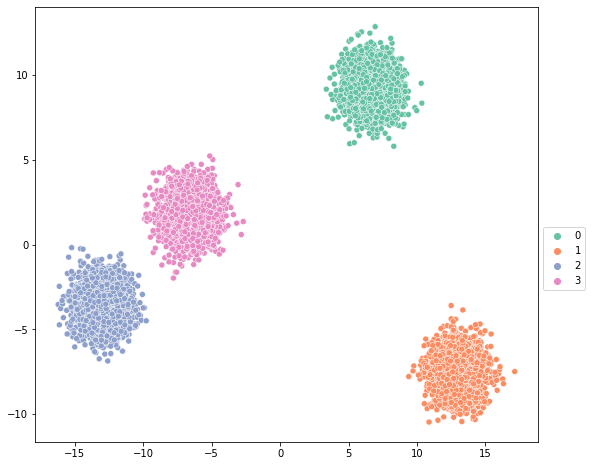

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(data[0])
fig = plt.figure(figsize=(9,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=df['label'],palette="Set2");
plt.legend(loc=(1.01,0.35));

The centroids of the K = 4 clusters are [array([-5.67478251,  8.15549525,  3.33720624,  3.07187656, -8.23319275,
        1.25854557]), array([ 6.68368994, -5.77123142, -6.35404357, -6.31708326, -3.93564167,
        0.48491996]), array([-1.72915449, -3.70737101,  2.57828972, -6.87406483, -4.25055459,
       -2.47314195]), array([-0.9252462 , -4.7131412 ,  1.86742113, -7.58304352, -4.04071579,
       -2.85937587])]

Number of iterations = 58


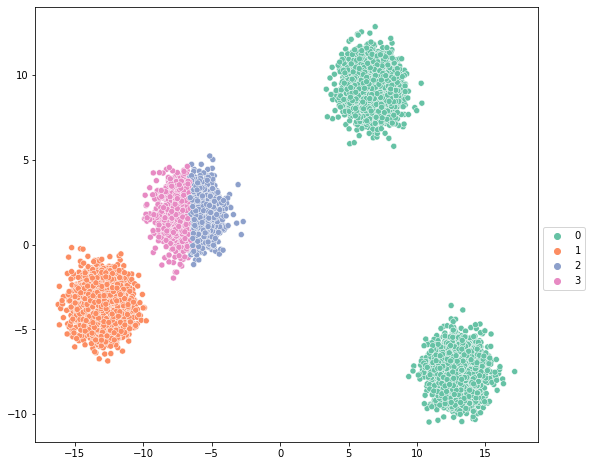

In [22]:
data = df.drop('label', axis=1).values.tolist()
(mu,it) = list_kmeans(k, data, NUMBER_OF_ITERATION, THRESHOLD)
print(f'The centroids of the K = {k} clusters are {mu}')
print(f'\nNumber of iterations = {it}')

cluster = df.apply(lambda df: assign([df.x,df.y,df.z,df.w,df.q,df.t],mu),axis=1)

fig = plt.figure(figsize=(9,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=cluster,palette="Set2");
plt.legend(loc=(1.01,0.35));

The centroids of the K = 4 clusters are [array([-5.67478251,  8.15549525,  3.33720624,  3.07187656, -8.23319275,
        1.25854557]), array([ 7.05575711, -5.26967884, -6.20696522, -6.29583692, -3.47266781,
        0.35824305]), array([-1.33234536, -4.20381918,  2.22740499, -7.22401671, -4.14697816,
       -2.66378701]), array([ 6.28126259, -6.31371001, -6.5131233 , -6.34006327, -4.43639358,
        0.62193353])]

Number of iterations = 37


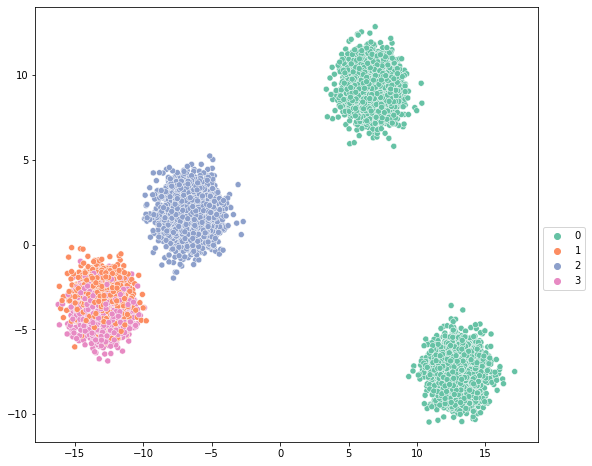

In [23]:
data = df.drop('label', axis=1).values
(mu,it) = npkmeans(k, data, NUMBER_OF_ITERATION, THRESHOLD)
print(f'The centroids of the K = {k} clusters are {mu}')
print(f'\nNumber of iterations = {it}')

cluster = df.apply(lambda df: assign([df.x,df.y,df.z,df.w,df.q,df.t],mu),axis=1)

fig = plt.figure(figsize=(9,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=cluster,palette="Set2");
plt.legend(loc=(1.01,0.35));

The centroids of the K = 4 clusters are [[-1.3323453595166685, -4.203819177883936, 2.2274049856273637, -7.224016712883403, -4.146978161590769, -2.663787013846473], [-8.842999753707206, 7.315372181406797, 2.0389760152929894, 4.168934021214526, -9.60352315659329, 9.38070726125413], [6.683689944153777, -5.7712314172099735, -6.3540435654714456, -6.317083260056056, -3.935641667845381, 0.48491995742436966], [-2.506565257865499, 8.99561832272115, 4.63543646788749, 1.9748191062560194, -6.86286233740955, -6.863616118817499]]

Number of iterations = 8


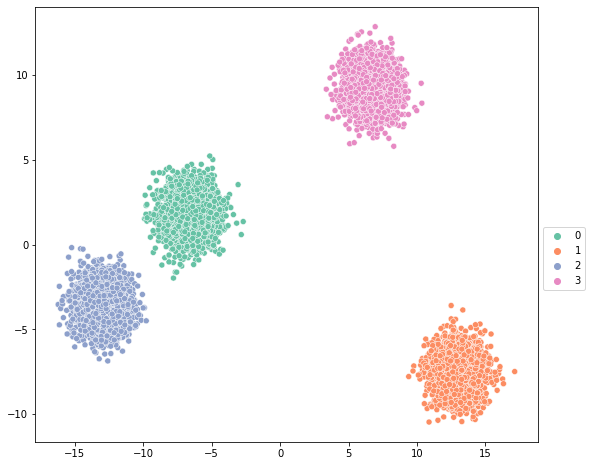

In [24]:
model = KMeans(n_clusters=k,init='random',max_iter=NUMBER_OF_ITERATION,tol=THRESHOLD,random_state=42)
y_predict = model.fit_predict(data)

print(f'The centroids of the K = {k} clusters are {model.cluster_centers_.tolist()}')
print(f'\nNumber of iterations = {model.n_iter_}')

cluster = df.apply(lambda df: assign([df.x,df.y,df.z,df.w,df.q,df.t],model.cluster_centers_.tolist()),axis=1)

fig = plt.figure(figsize=(9,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=cluster,palette="Set2");
plt.legend(loc=(1.01,0.35));

In conclusion, we can see that `sklearn.KMeans`, beside guaranteering a correct partitioning (K-means strongly depends on vectors' initialization, i.e., change initialization does not guarantee the same solution because it’s a greedy algorithm), is more efficient and that the one based on list is faster than the one based on numpy arrays. A further update for this project could be improving the initialization selecting initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia (like *kmeans++* method/*init* option present in `sklearn.KMeans`).